[Index](Index.ipynb) - [Back](Widget Events.ipynb) - [Next](Custom Widget - Hello World.ipynb)

In [1]:
%%html
<style>
.example-container { background: #999999; padding: 2px; min-height: 100px; }
.example-container.sm { min-height: 50px; }
.example-box { background: #9999FF; width: 50px; height: 50px; text-align: center; vertical-align: middle; color: white; font-weight: bold; margin: 2px;}
.example-box.med { width: 65px; height: 65px; }   
.example-box.lrg { width: 80px; height: 80px; }   
</style>

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Widget Styling

## Parent/child relationships

To display widget A inside widget B, widget A must be a child of widget B.  Widgets that can contain other widgets have a `children` attribute.  This attribute can be set via a keyword argument in the widget's constructor or after construction.  Calling display on an object with children automatically displays the children.

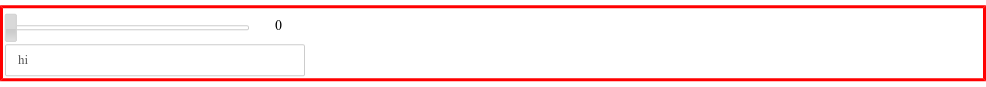

In [3]:
from IPython.display import display

float_range = widgets.FloatSlider()
string = widgets.Text(value='hi')
container = widgets.Box(children=[float_range, string])
container.layout.border = '3px red dotted'

display(container) # Displays the `container` and all of it's children.

### After the parent is displayed

Children can be added to parents after the parent has been displayed.  The parent is responsible for rendering its children.

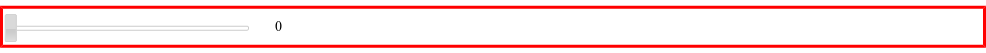

In [4]:
container = widgets.Box()
container.layout.border = '3px red dotted'
display(container)

int_range = widgets.IntSlider()
container.children=[int_range]

## Fancy boxes

If you need to display a more complicated set of widgets, there are specialized containers that you can use.  To display multiple sets of widgets, you can use an `Accordion` or a `Tab` in combination with one `Box` per set of widgets (as seen below).  The "pages" of these widgets are their children.  To set the titles of the pages, use `set_title`.

### Accordion

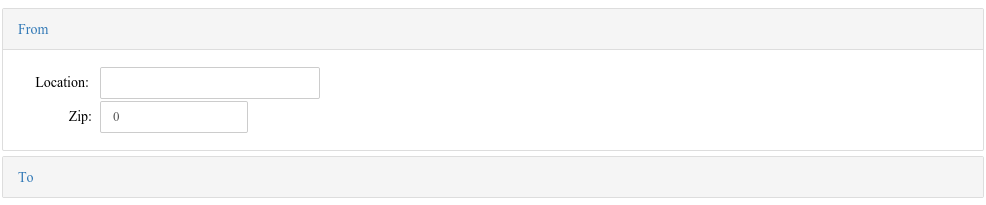

In [5]:
name1 = widgets.Text(description='Location:')
zip1 = widgets.BoundedIntText(description='Zip:', min=0, max=99999)
page1 = widgets.Box(children=[name1, zip1])

name2 = widgets.Text(description='Location:')
zip2 = widgets.BoundedIntText(description='Zip:', min=0, max=99999)
page2 = widgets.Box(children=[name2, zip2])

accord = widgets.Accordion(children=[page1, page2], width=400)
display(accord)

accord.set_title(0, 'From')
accord.set_title(1, 'To')

### TabWidget

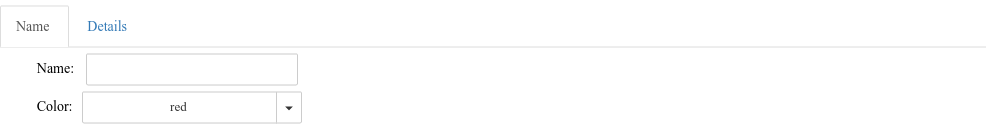

In [6]:
name = widgets.Text(description='Name:', padding=4)
name.layout.padding = 4
color = widgets.Dropdown(description='Color:', options=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
color.layout.padding = 4
page1 = widgets.Box(children=[name, color])
page1.layout.padding = 4

age = widgets.IntSlider(description='Age:', min=0, max=120, value=50)
age.layout.padding = 4
gender = widgets.RadioButtons(description='Gender:', options=['male', 'female'])
gender.layout.padding = 4
page2 = widgets.Box(children=[age, gender])
page2.layout.padding = 4

tabs = widgets.Tab(children=[page1, page2])
display(tabs)

tabs.set_title(0, 'Name')
tabs.set_title(1, 'Details')

## Alignment

Most widgets have a `description` attribute, which allows a label for the widget to be defined.
The label of the widget has a fixed minimum width.
The text of the label is always right aligned and the widget is left aligned:

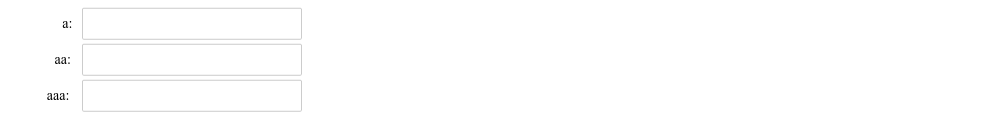

In [7]:
display(widgets.Text(description="a:"))
display(widgets.Text(description="aa:"))
display(widgets.Text(description="aaa:"))

If a label is longer than the minimum width, the widget is shifted to the right:

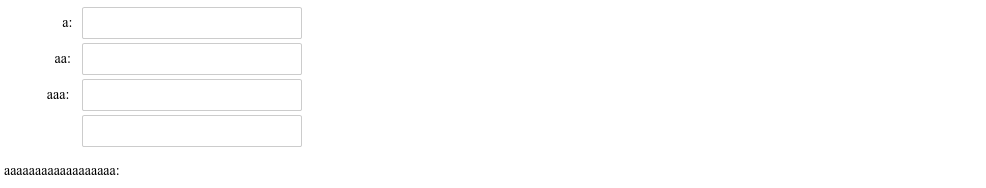

In [8]:
display(widgets.Text(description="a:"))
display(widgets.Text(description="aa:"))
display(widgets.Text(description="aaa:"))
display(widgets.Text(description="aaaaaaaaaaaaaaaaaa:"))

If a `description` is not set for the widget, the label is not displayed:

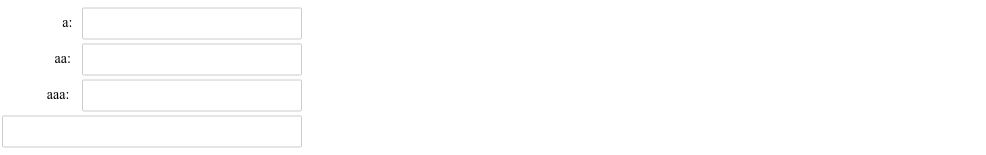

In [9]:
display(widgets.Text(description="a:"))
display(widgets.Text(description="aa:"))
display(widgets.Text(description="aaa:"))
display(widgets.Text())

### Flex boxes

Widgets can be aligned using the `FlexBox`, `HBox`, and `VBox` widgets.

### Application to widgets

Widgets display vertically by default:

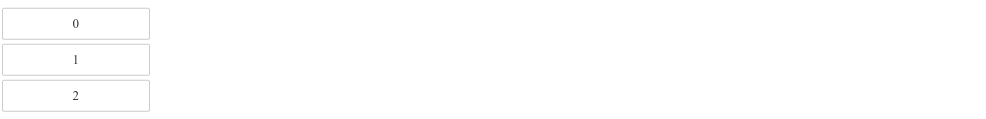

In [10]:
buttons = [widgets.Button(description=str(i)) for i in range(3)]
display(*buttons)

### Using hbox

To make widgets display horizontally, they can be children of an `HBox` widget.

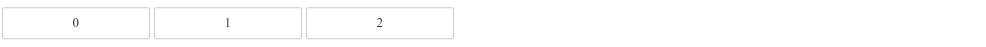

In [11]:
container = widgets.HBox(children=buttons)
display(container)

## Visibility

The `display` and `visibility` properties of the layout property of widgets can be used to hide or show widgets that have already been displayed (as seen below).  The map to `display` and `visibility` in the CSS spec.

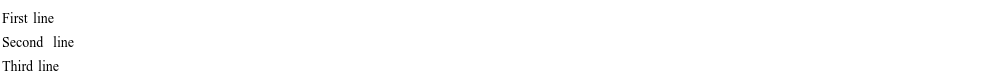

In [12]:
w1 = widgets.Label(value="First line")
w2 = widgets.Label(value="Second line")
w3 = widgets.Label(value="Third line")
display(w1, w2, w3)

In [13]:
w2.layout.display='none'
w2.layout.visibility=''

In [14]:
w2.layout.display=''
w2.layout.visibility='hidden'

In [15]:
w2.layout.display=''
w2.layout.visibility=''

### Another example

In the example below, a form is rendered, which conditionally displays widgets depending on the state of other widgets.  Try toggling the student checkbox.

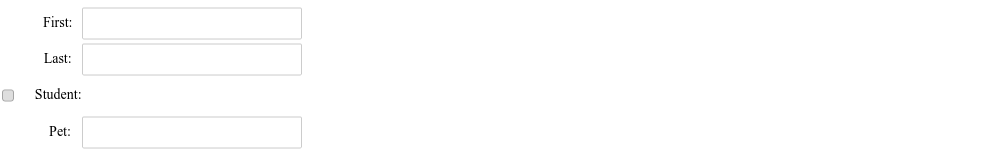

In [16]:
form = widgets.VBox()
first = widgets.Text(description="First:")
last = widgets.Text(description="Last:")

student = widgets.Checkbox(description="Student:", value=False)
school_info = widgets.VBox(children=[
    widgets.Text(description="School:"),
    widgets.IntText(description="Grade:", min=0, max=12)
    ])
school_info.layout.display = 'none'

pet = widgets.Text(description="Pet:")
form.children = [first, last, student, school_info, pet]
display(form)

def on_student_toggle(change):
    if change['new']:
        school_info.layout.display = ''
    else:
        school_info.layout.display = 'none'

student.observe(on_student_toggle, names='value')


[Index](Index.ipynb) - [Back](Widget Events.ipynb) - [Next](Custom Widget - Hello World.ipynb)